In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ecl = pd.read_table('ecl.dat',delim_whitespace=True,names=('Object','I','V-I','Depth','P','P_err','t0'))
# ecl

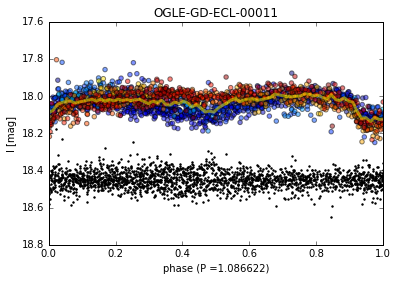

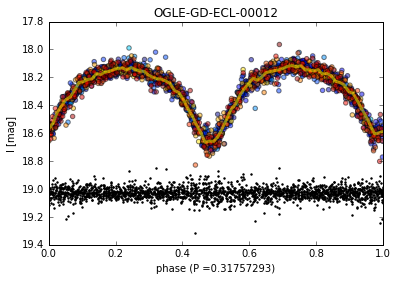

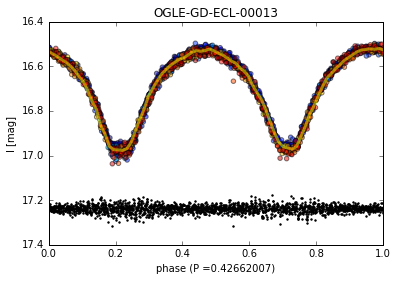

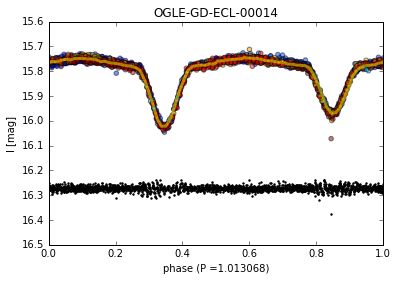

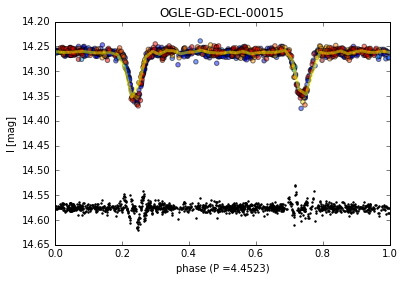

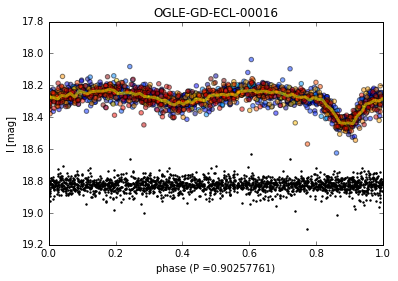

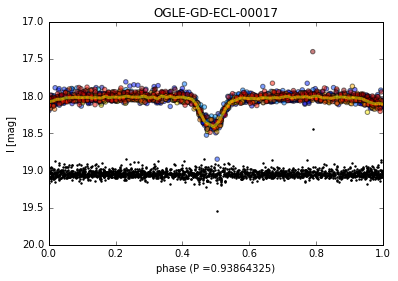

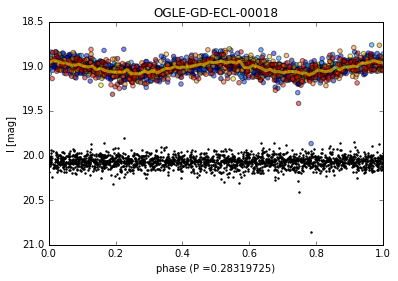

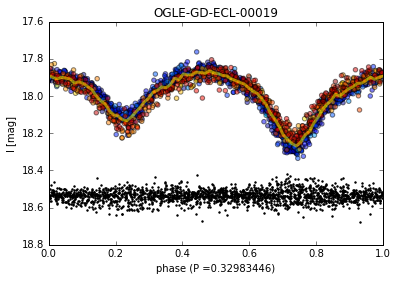

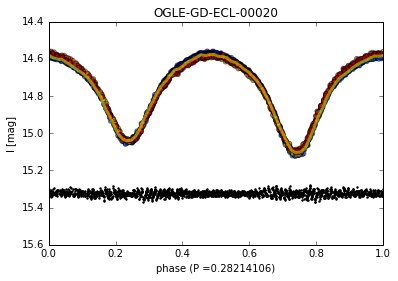

In [33]:
# k = 150
for k in range(10, 20):
    # this is inside the loop over k
    file = 'phot/I/' + ecl['Object'][k] + '.dat'
    df = pd.read_table(file,delim_whitespace=True,names=('time','mag','err'))
    p = ecl['P'][k]

    phase = np.mod(df['time'], p) / p
    
    n_bin = int(np.floor(len(phase) / 25))
    if n_bin < 20:
        n_bin = 20
    # n_bin = 40
    min_num = 5
    #x_bin = np.zeros(n_bin)
    y_bin = np.zeros(n_bin)
    x_bin = np.linspace(0, 1, n_bin) #+ (0.5 / n_bin)
    mag2 = np.zeros(len(phase))

    for j in range(n_bin):
        data = np.where((phase >= j/n_bin) & (phase < (j + 1)/n_bin))[0]
        # if theres not enough data, dont fill the bin
        if len(data) >= min_num:
            # x_bin[j] = np.median(phase[data])
            y_bin[j] = np.median(df['mag'].values[data])
            mag2[data] = df['mag'].values[data] - y_bin[j]

    plt.figure()
    plt.scatter(phase, df['mag'], alpha = 0.5, c = df['time'])
    plt.xlabel('phase (P =' + str(p) + ')')
    plt.ylabel('I [mag]')
    plt.title(ecl['Object'][k])
    plt.xlim(0, 1)
    plt.plot(x_bin, y_bin, c = 'yellow', lw = 3, alpha = .5)
    plt.scatter(phase, mag2 + np.max(df['mag']) + 0.2, s = 2, c = 'black')
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
# Step 3: Subtract off known period. Using polyfit or a running median, etc.
# Step 4: Make a new periodogram and search for new periods.